# Setup

Initial importam cateva librari uzuale si definim functia care va fi folosita pentru a salva figurile generate.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn import ensemble
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from __future__ import division, print_function, unicode_literals
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "merge_conflicts"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images_merge_conflicts", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Get the data

Incarcam datele in data din fisierul csv si afisam datele citite

In [2]:
data=pd.read_csv("MergeConflictsDataset.csv",header=0)
data

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26983,c52216c411e4d7d9ef7845926f471f49f48b3ea5,5d50b1ca2496766e6d3f3673e1f6abff20f9ffaf,d7727481e759ef6ac2c285d64c4ebb86666652f9,5d50b1ca2496766e6d3f3673e1f6abff20f9ffaf,1,66,0,0,1,184,...,0,0,0,0,0,19,19,19.00000,19.0,0
26984,8bf4fb99b439379ed99f0a4fc761fa65ca31d8ba,a248acc589a43d7234d383252546b99b27ec32b9,478863dfe34904b9490be64c0d508e0af6b46b2f,ebffde52d50a6c8f9973ec675b8ab17dea5420e1,1,1,1,2,1,762,...,0,0,0,0,0,30,34,33.20000,34.0,0
26985,a27a50f87f61d871ddb1aeed6993b132fd657ea6,542ff7fe4297d73a39664b468962ab681e4bea91,ddddae9b5f9537cb06d2c4872184fa25d9f3ca77,542ff7fe4297d73a39664b468962ab681e4bea91,1,1,1,0,1,22,...,0,0,0,0,0,8,58,33.00000,33.0,0
26986,ddddae9b5f9537cb06d2c4872184fa25d9f3ca77,542ff7fe4297d73a39664b468962ab681e4bea91,e6ed8366b6e1e72bc8de97159198c64edab5cd96,542ff7fe4297d73a39664b468962ab681e4bea91,1,1,1,0,1,11,...,0,0,0,0,0,8,8,8.00000,8.0,0


Afisam numarul de randuri si coloane

In [3]:
data.shape

(26988, 37)

Afisam denumirea coloanelor

In [4]:
data.columns

Index(['commit', 'parent1', 'parent2', 'ancestor', 'is pr', 'added lines',
       'deleted lines', 'devs parent1', 'devs parent2', 'time', 'nr files',
       'added files', 'deleted files', 'renamed files', 'copied files',
       'modified files', 'nr commits1', 'nr commits2', 'density1', 'density2',
       'fix', 'bug', 'feature', 'improve', 'document', 'refactor', 'update',
       'add', 'remove', 'use', 'delete', 'change', 'messages_min',
       'messages_max', 'messages_mean', 'messages_median', 'conflict'],
      dtype='object')

Afisam informatii despre datele care se afla in tabel

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26988 entries, 0 to 26987
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26988 non-null  object 
 1   parent1          26988 non-null  object 
 2   parent2          26988 non-null  object 
 3   ancestor         26987 non-null  object 
 4   is pr            26988 non-null  int64  
 5   added lines      26988 non-null  int64  
 6   deleted lines    26988 non-null  int64  
 7   devs parent1     26988 non-null  int64  
 8   devs parent2     26988 non-null  int64  
 9   time             26988 non-null  int64  
 10  nr files         26988 non-null  int64  
 11  added files      26988 non-null  int64  
 12  deleted files    26988 non-null  int64  
 13  renamed files    26988 non-null  int64  
 14  copied files     26988 non-null  int64  
 15  modified files   26988 non-null  int64  
 16  nr commits1      26988 non-null  int64  
 17  nr commits2 

Stergem coloanele care nu sunt relevante pentru rezolvarea conflictului


In [6]:
data_kept = data.drop(['commit','parent1','parent2','ancestor'], axis=1)

In [7]:
data_kept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26988 entries, 0 to 26987
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   is pr            26988 non-null  int64  
 1   added lines      26988 non-null  int64  
 2   deleted lines    26988 non-null  int64  
 3   devs parent1     26988 non-null  int64  
 4   devs parent2     26988 non-null  int64  
 5   time             26988 non-null  int64  
 6   nr files         26988 non-null  int64  
 7   added files      26988 non-null  int64  
 8   deleted files    26988 non-null  int64  
 9   renamed files    26988 non-null  int64  
 10  copied files     26988 non-null  int64  
 11  modified files   26988 non-null  int64  
 12  nr commits1      26988 non-null  int64  
 13  nr commits2      26988 non-null  int64  
 14  density1         26988 non-null  int64  
 15  density2         26988 non-null  int64  
 16  fix              26988 non-null  int64  
 17  bug         

Afisam informati despre coloanele salvate

In [8]:
data_kept.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26988.000000,2.698800e+04,2.698800e+04,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,...,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000
mean,0.777827,4.253755e+02,2.502937e+02,4.654254,1.911368,240.794501,0.751704,2.430006,1.395768,0.969690,...,4.314177,0.954980,1.338187,0.096228,1.007411,51.388024,104.634023,69.444945,68.011653,0.054432
std,0.415714,8.885240e+03,1.027630e+04,12.227462,6.532536,908.246361,10.617551,67.821839,90.589096,64.227302,...,12.921030,3.202485,4.268581,0.541770,6.031895,34.555932,89.457205,40.054486,39.381905,0.226872
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.333333,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.689744,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


Fisierele schimbate simultan pe cele 2 branch-uri pot produce conflicte.
Astfel, stergem liniile care au nr files=0 pentru ca nu pot sa apara conflicte in acest caz.

In [9]:
data_kept.drop(data_kept.loc[data_kept['nr files']==0].index, inplace=True)

Am salvat histograma pentru fiecare coloana care se gaseste in data_kept prin intermediul functiei definite in Setup

Saving figure attribute_histogram_plots


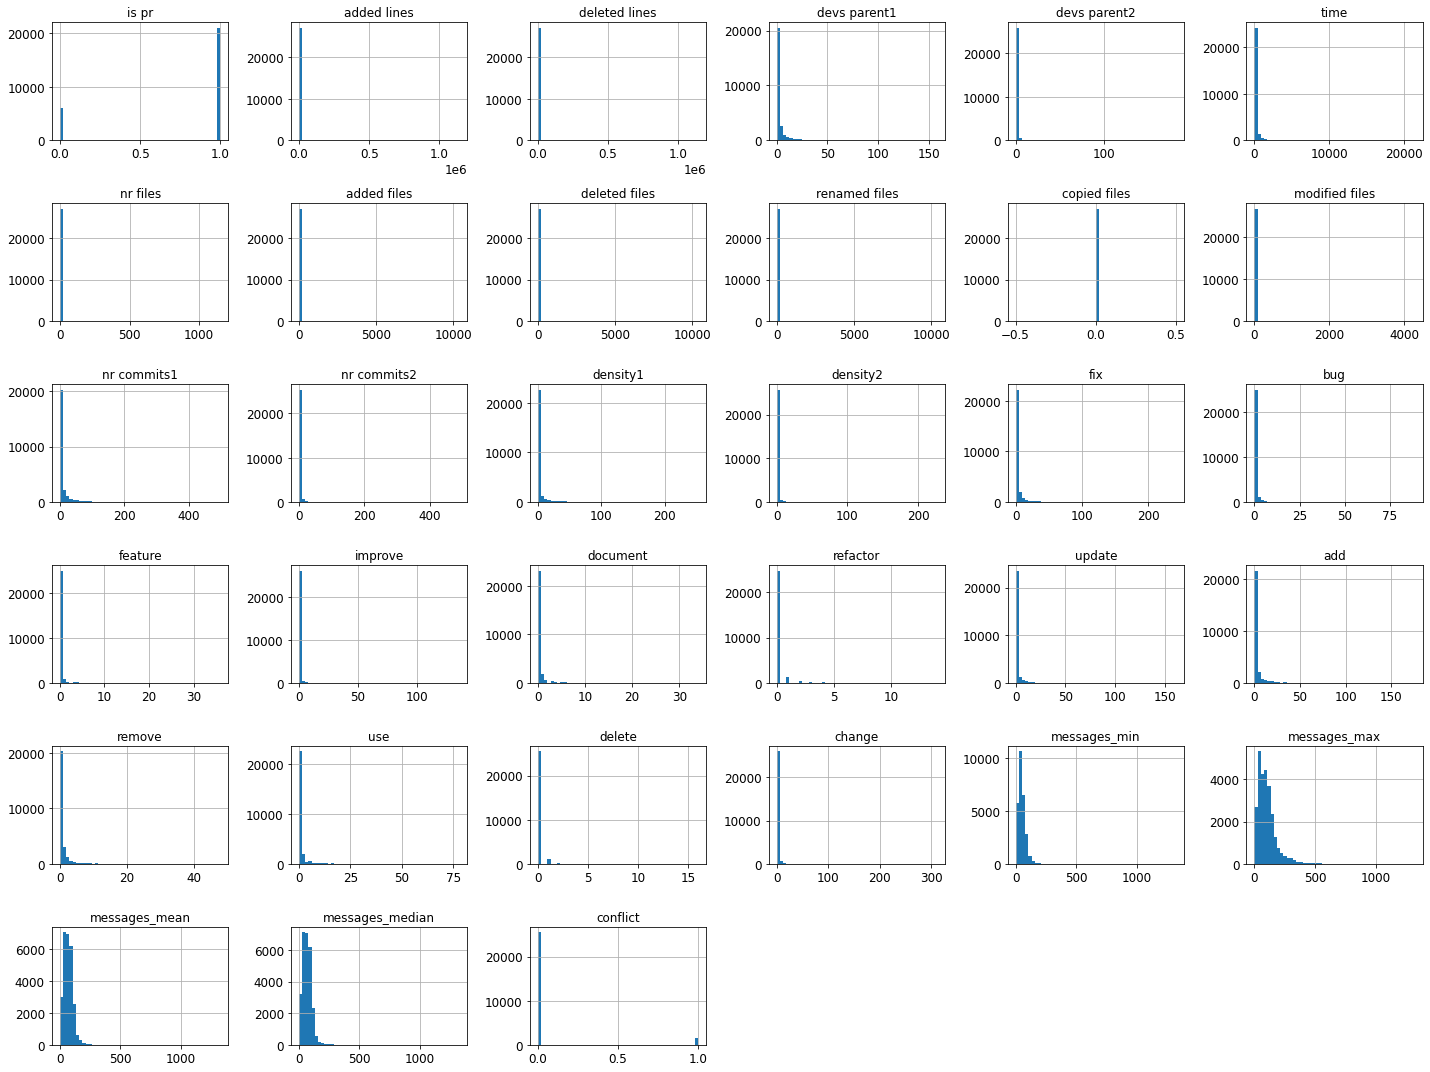

In [10]:
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In acest mod s-au redus numarul de linii din data_kept.

# Split data

Impartim datele din data_kept in 2 seturi: train si set cu o proportie de 80%-20%

In [11]:
train_set, test_set = train_test_split(data_kept, test_size=0.2, random_state=42)

In [12]:
print(len(train_set), "train +", len(test_set),"test")

4515 train + 1129 test


In [13]:
test_set.head()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
10399,0,0,0,1,1,0,8,0,0,0,...,0,0,0,0,0,16,16,16.000000,16.0,1
21045,1,398,179,4,1,5,3,0,0,0,...,6,0,0,0,1,45,213,118.714286,81.5,0
15879,0,148,28,4,4,939,3,0,0,0,...,7,0,0,0,0,23,194,85.039683,82.0,1
18963,1,260,51,8,1,95,1,0,0,0,...,1,1,4,0,1,40,156,78.900000,76.0,0
19659,1,1,0,4,1,600,1,0,0,0,...,2,0,0,0,0,32,86,59.714286,61.0,0


In [14]:
train_set["conflict"].value_counts() / len(train_set)

0    0.747287
1    0.252713
Name: conflict, dtype: float64

In [15]:
test_set["conflict"].value_counts() / len(test_set)

0    0.736935
1    0.263065
Name: conflict, dtype: float64

Se poate observa ca proportiile valorilor intre cele doua set-uri sunt aproximativ  similare.

In [16]:
data_matrix=train_set.copy()

Realizam matricea de corelatie  in care se stocheaza valoarea corelatiei intre fiecare 2 coloane din setul de date train

In [17]:
corr_matrix = data_matrix.corr()
corr_matrix

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
is pr,1.000000,-0.103145,-0.038015,0.132838,-0.208404,0.013455,-0.071197,-0.103091,-0.023495,-0.020831,...,-0.024361,-0.022658,-0.016193,0.002365,0.054110,0.171729,0.001246,0.118053,0.139761,-0.559747
added lines,-0.103145,1.000000,0.223444,-0.050792,0.263861,0.026855,0.030119,0.790351,0.058928,0.036722,...,0.043126,0.047995,0.035929,0.031374,0.018410,-0.066003,0.014728,-0.035583,-0.047574,0.101083
deleted lines,-0.038015,0.223444,1.000000,-0.018031,0.050984,0.001131,0.013189,0.144969,0.966203,0.006908,...,0.003163,0.024549,0.007559,0.000326,0.035270,-0.033833,0.000611,-0.024022,-0.029483,0.046464
devs parent1,0.132838,-0.050792,-0.018031,1.000000,-0.070409,0.380477,0.051310,-0.051953,-0.011337,-0.010137,...,0.743045,0.667075,0.577863,0.223969,0.269873,-0.006864,0.311672,0.107722,0.108224,-0.071319
devs parent2,-0.208404,0.263861,0.050984,-0.070409,1.000000,0.389427,0.078097,0.251975,0.021628,0.009186,...,0.379649,0.411566,0.126649,0.093570,0.126600,-0.118178,0.033238,-0.062620,-0.070024,0.258209
time,0.013455,0.026855,0.001131,0.380477,0.389427,1.000000,-0.010843,0.053174,0.002237,0.014242,...,0.469017,0.568408,0.165769,0.170439,0.088481,-0.083903,0.045640,-0.044480,-0.042206,0.062409
nr files,-0.071197,0.030119,0.013189,0.051310,0.078097,-0.010843,1.000000,0.030901,0.009604,-0.000038,...,0.047186,0.091690,0.093077,0.001047,0.250357,-0.071789,0.075794,-0.016358,-0.041922,0.117668
added files,-0.103091,0.790351,0.144969,-0.051953,0.251975,0.053174,0.030901,1.000000,0.056402,0.057491,...,0.049543,0.048737,0.035445,0.049518,0.021885,-0.059125,0.018280,-0.029436,-0.036543,0.097728
deleted files,-0.023495,0.058928,0.966203,-0.011337,0.021628,0.002237,0.009604,0.056402,1.000000,0.005029,...,-0.001338,0.009059,0.001857,-0.000698,0.014123,-0.020899,-0.003330,-0.016124,-0.017897,0.034326
renamed files,-0.020831,0.036722,0.006908,-0.010137,0.009186,0.014242,-0.000038,0.057491,0.005029,1.000000,...,-0.007678,-0.006026,-0.006240,-0.002952,-0.002896,-0.015707,-0.014012,-0.024569,-0.024502,0.030821


Vedem care sunt coloanele care  influenteaza valoarea pentru conflict

Generam grafice de dependenta intre mai multe caracteristici prezente pentru a vedea care valori depind mai mult una de cealalta.
Am ales is pr, add,conflicts, devs parent2, nr files, nr commits2 deoarece acestea prezinta cea mai mare corelatie raportata la valoarea lui conflict

In [18]:
corr_matrix["conflict"].sort_values(ascending=False)

conflict           1.000000
nr commits2        0.314438
devs parent2       0.258209
density2           0.241647
refactor           0.124070
nr files           0.117668
add                0.111861
added lines        0.101083
added files        0.097728
remove             0.093320
change             0.082413
modified files     0.080918
update             0.075747
feature            0.068683
time               0.062409
messages_max       0.060914
fix                0.058862
deleted lines      0.046464
bug                0.045055
use                0.038679
deleted files      0.034326
renamed files      0.030821
improve            0.028878
document           0.028081
delete             0.024605
nr commits1       -0.012654
devs parent1      -0.071319
messages_mean     -0.073252
messages_median   -0.099032
density1          -0.110267
messages_min      -0.162519
is pr             -0.559747
copied files            NaN
Name: conflict, dtype: float64

Saving figure scatter_matrix_plot


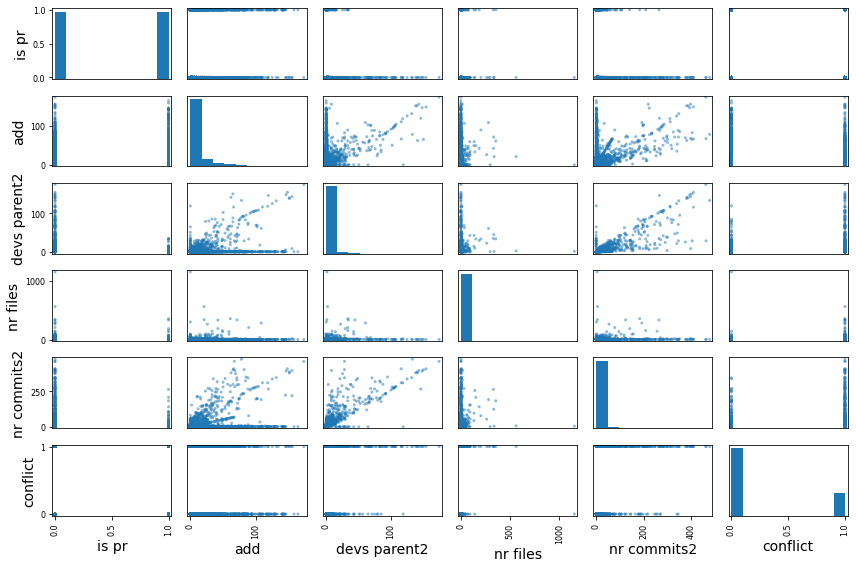

In [19]:
attributes = ["is pr","add","devs parent2","nr files","nr commits2","conflict"]
scatter_matrix(data_matrix[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [20]:
data.groupby('conflict').size()

conflict
0    25519
1     1469
dtype: int64

Avem mai multe valori de 1 decat de 0 pentru conflicts => date nebalansate

Saving figure value of conflict


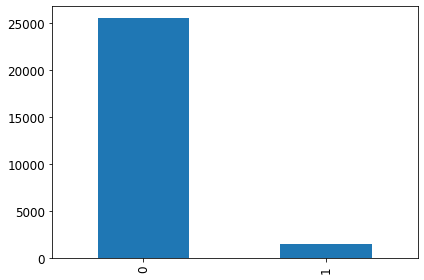

In [21]:
data["conflict"].value_counts().plot.bar()
save_fig("value of conflict")

# Prepare the data for Machine Learning algorithms

In [22]:
x_train = train_set[train_set.columns.drop(['conflict'])]
y_train = train_set['conflict']
x_test = test_set[test_set.columns.drop(['conflict'])]
y_test = test_set['conflict']

Se vor elimina valorile nule daca exista.
In cazul de fata nu exista

In [23]:
incomplete_rows = train_set[train_set.isnull().any(axis=1)].head()
incomplete_rows

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict


Scalam datele de train si de test

In [24]:
num_pipeline = Pipeline([
    
        ('std_scaler', StandardScaler()),
    ])
x_train_sc = num_pipeline.fit_transform(x_train)
x_test_sc = num_pipeline.fit_transform(x_test)

In [25]:
print(f"Before scaler \n {x_train}")

Before scaler 
        is pr  added lines  deleted lines  devs parent1  devs parent2  time  \
22705      0          112            115            48             1    49   
13324      1            1              0             7             1    78   
13429      1            1              0            10             1    49   
10333      0           28             17             1             1     0   
11476      0          101            614             8             1   332   
...      ...          ...            ...           ...           ...   ...   
18400      1           28              0            40             1  4661   
24998      0        11843           1095             2            39   741   
25099      0         3533             74             2            11   172   
25854      0           15             15            61             2  4759   
3668       0           21             21            31             3     2   

       nr files  added files  deleted files  re

In [26]:
print(f"After scaler \n {x_train_sc}")

After scaler 
 [[-1.00110803 -0.10487829 -0.03361646 ...  4.44876658 11.1318543
  11.39578048]
 [ 0.99889319 -0.12286238 -0.03992741 ... -0.57634114 -0.89294289
  -1.06000859]
 [ 0.99889319 -0.12286238 -0.03992741 ... -0.60326136 -0.81912065
  -0.81938539]
 ...
 [-1.00110803  0.44938814 -0.03586645 ...  0.85940392  0.23272166
  -0.38060191]
 [-1.00110803 -0.12059412 -0.03910424 ...  0.13255799  0.25349706
   0.35542198]
 [-1.00110803 -0.119622   -0.03877498 ...  0.16845161 -0.37801355
  -0.38060191]]


# Select and train a model

## Decision Tree Classifier

In [27]:
decision_tree = dtc(criterion='entropy', max_depth=4)
decision_tree = decision_tree.fit(x_train_sc, y_train)
print(f"Decision Tree Clasifier accuracy score : {decision_tree.score(x_test_sc, y_test)}")

Decision Tree Clasifier accuracy score : 0.7989371124889283


In [28]:
y_pred = decision_tree.predict(x_test_sc)

De cate ori a prezis ca e conflict in cazul in care avem sau nu conflict.

In [29]:
# recall
recall_score(y_test, y_pred, average = 'macro')

0.6806324462574462

Daca avem conflict, de cate ori a prezis bine sau nu.

In [30]:
# precizia
precision_score(y_test, y_pred, average='binary')

0.6881720430107527

Verificam eficienta clasificatorului pentru datele de train si test.

In [31]:
final_predictions = decision_tree.predict(x_train_sc)

mse = np.sqrt(mean_squared_error(final_predictions,y_train))

print("RMSE Decision  Tree Train:",mse)

mae = mean_absolute_error(final_predictions,y_train)
print("MAE Decision  Tree Train:",mae)

final_mse = np.sqrt(mean_squared_error(y_pred,y_test))

print("RMSE Decision  Tree Train:",final_mse)

final_mae = mean_absolute_error(y_pred,y_test)
print("MAE Decision  Tree Train:",final_mae)

RMSE Decision  Tree Train: 0.3886541505329222
MAE Decision  Tree Train: 0.15105204872646733
RMSE Decision  Tree Train: 0.44840036519952986
MAE Decision  Tree Train: 0.20106288751107174


In [32]:
# cross validation/ de 10 ori
tree_scores = cross_val_score(decision_tree, x_train_sc, y_train, scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Scores: [0.39071072 0.39911406 0.37921671 0.41541109 0.40187613 0.40779544
 0.40779544 0.39955629 0.41050507 0.40506768]
Mean: 0.4017048621205781
Standard deviation: 0.009943586973092486


## Random Forest

In [33]:
random_forest = ensemble.RandomForestClassifier()
random_forest.fit(x_train_sc, y_train)  
print(f"Random Forest Clasifier accuracy score : {random_forest.score(x_test_sc,y_test)}")

Random Forest Clasifier accuracy score : 0.8423383525243578


In [34]:
y_pred = random_forest.predict(x_test_sc)

De cate ori a prezis ca e conflict in cazul in care avem sau nu conflict.

In [35]:
#recall
recall_score(y_test, y_pred, average = 'macro')

0.77286689005439

Daca avem conflict, de cate ori a prezis bine sau nu.

In [36]:
# precizia
precision_score(y_test, y_pred, average='binary')

0.7351778656126482

Verificam eficienta clasificatorului pentru datele de train si test.

In [37]:
final_predictions = random_forest.predict(x_train_sc)

mse = np.sqrt(mean_squared_error(final_predictions,y_train))

print("RMSE Random Forest Train:",mse)

mae = mean_absolute_error(final_predictions,y_train)
print("MAE  Random Forest Train:",mae)

final_mse = np.sqrt(mean_squared_error(y_pred,y_test))

print("RMSE  Random Forest Train:",final_mse)

final_mae = mean_absolute_error(y_pred,y_test)
print("MAE  Random Forest Train:",final_mae)

RMSE Random Forest Train: 0.02104680224709564
MAE  Random Forest Train: 0.00044296788482834997
RMSE  Random Forest Train: 0.397066301108067
MAE  Random Forest Train: 0.15766164747564215


In [38]:
random_scores = cross_val_score(random_forest, x_train_sc, y_train,
                             scoring="neg_mean_squared_error", cv=10)
random_rmse_scores = np.sqrt(-random_scores)
display_scores(random_rmse_scores)

Scores: [0.39071072 0.37333702 0.34882863 0.37628835 0.37628835 0.36777029
 0.3967719  0.36777029 0.37077255 0.40506768]
Mean: 0.377360578056651
Standard deviation: 0.015435732336716393


## Gradient Boosting Classifier

In [39]:
gradient_boosting=ensemble.GradientBoostingClassifier()
gradient_boosting.fit(x_train_sc, y_train) 
print(f"Gradient Boosting accuracy score : {gradient_boosting.score(x_test_sc,y_test)}")

Gradient Boosting accuracy score : 0.8317094774136404


In [40]:
y_pred = gradient_boosting.predict(x_test_sc)

De cate ori a prezis ca e conflict in cazul in care avem sau nu conflict.

In [41]:
#recall
recall_score(y_test, y_pred, average = 'macro')

0.7461696289821289

Daca avem conflict, de cate ori a prezis bine sau nu.

In [42]:
# precizia
precision_score(y_test, y_pred, average='binary')

0.7336244541484717

Verificam eficienta clasificatorului pentru datele de train si test.

In [43]:
final_predictions = gradient_boosting.predict(x_train_sc)

mse = np.sqrt(mean_squared_error(final_predictions,y_train))

print("RMSE Gradient Boosting Train:",mse)

mae = mean_absolute_error(final_predictions,y_train)
print("MAE  Gradient Boosting Train:",mae)

final_mse = np.sqrt(mean_squared_error(y_pred,y_test))

print("RMSE  Gradient Boosting Train:",final_mse)

final_mae = mean_absolute_error(y_pred,y_test)
print("MAE Gradient Boosting Train:",final_mae)

RMSE Gradient Boosting Train: 0.3354308315381889
MAE  Gradient Boosting Train: 0.11251384274640089
RMSE  Gradient Boosting Train: 0.41023227882062085
MAE Gradient Boosting Train: 0.1682905225863596


In [44]:
gradient_scores = cross_val_score(gradient_boosting, x_train_sc, y_train,
                             scoring="neg_mean_squared_error", cv=10)
gradient_rmse_scores = np.sqrt(-gradient_scores)
display_scores(gradient_rmse_scores)

Scores: [0.38786915 0.36433963 0.34564292 0.39071072 0.3612907  0.38543321
 0.39396782 0.36474333 0.39114364 0.39114364]
Mean: 0.3776284756576237
Standard deviation: 0.016130230202560554


## Naive Bayes Classifier

In [45]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train_sc, y_train) 
print(f"Gaussian NB accuracy score : {gaussian_nb.score(x_test_sc,y_test)}")

Gaussian NB accuracy score : 0.770593445527015


In [46]:
y_pred = gaussian_nb.predict(x_test_sc)

De cate ori a prezis ca e conflict in cazul in care avem sau nu conflict.

In [47]:
#recall
recall_score(y_test, y_pred, average = 'macro')

0.6029445091945093

Daca avem conflict, de cate ori a prezis bine sau nu.

In [48]:
# precizia
precision_score(y_test, y_pred, average='binary')

0.6727272727272727

Verificam eficienta clasificatorului pentru datele de train si test.

In [49]:
final_predictions = gaussian_nb.predict(x_train_sc)

mse = np.sqrt(mean_squared_error(final_predictions,y_train))

print("RMSE Naive Bayes Train:",mse)

mae = mean_absolute_error(final_predictions,y_train)
print("MAE  Naive Bayes Train:",mae)

final_mse = np.sqrt(mean_squared_error(y_pred,y_test))

print("RMSE Naive Bayes  Train:",final_mse)

final_mae = mean_absolute_error(y_pred,y_test)
print("MAE Naive Bayes Train:",final_mae)

RMSE Naive Bayes Train: 0.47460422399639046
MAE  Naive Bayes Train: 0.22524916943521595
RMSE Naive Bayes  Train: 0.4789640429854677
MAE Naive Bayes Train: 0.22940655447298494


In [50]:
gaussian_scores = cross_val_score(gaussian_nb, x_train_sc, y_train,
                             scoring="neg_mean_squared_error", cv=10)
gaussian_rmse_scores = np.sqrt(-gaussian_scores)
display_scores(gaussian_rmse_scores)

Scores: [0.47504075 0.4773637  0.48426571 0.46085722 0.4773637  0.47088161
 0.49833425 0.47323016 0.46136787 0.47088161]
Mean: 0.47495865936411497
Standard deviation: 0.010317011360289738


## K-Nearest Neighbor Classifier

In [51]:
kneighbor_classifier = KNeighborsClassifier(n_neighbors=4)
kneighbor_classifier.fit(x_train_sc, y_train)
print(f"K Neighbors accuracy score : {kneighbor_classifier.score(x_test_sc,y_test)}")

K Neighbors accuracy score : 0.8148804251550045


In [52]:
y_pred = kneighbor_classifier.predict(x_test_sc)

De cate ori a prezis ca e conflict in cazul in care avem sau nu conflict.

In [53]:
#recall
recall_score(y_test, y_pred, average = 'macro')

0.7087703962703963

Daca avem conflict, de cate ori a prezis bine sau nu.

In [54]:
# precizia
precision_score(y_test, y_pred, average='binary')

0.72

Verificam eficienta clasificatorului pentru datele de train si test.

In [55]:
final_predictions = kneighbor_classifier.predict(x_train_sc)

mse = np.sqrt(mean_squared_error(final_predictions,y_train))

print("RMSE K-Nearest Neighbor Train:",mse)

mae = mean_absolute_error(final_predictions,y_train)
print("MAE  K-Nearest Neighbor  Train:",mae)

final_mse = np.sqrt(mean_squared_error(y_pred,y_test))

print("RMSE K-Nearest Neighbor   Train:",final_mse)

final_mae = mean_absolute_error(y_pred,y_test)
print("MAE K-Nearest Neighbor  Train:",final_mae)

RMSE K-Nearest Neighbor Train: 0.35841412723303956
MAE  K-Nearest Neighbor  Train: 0.12846068660022147
RMSE K-Nearest Neighbor   Train: 0.4302552438320718
MAE K-Nearest Neighbor  Train: 0.18511957484499558


In [56]:
kneighbor_scores = cross_val_score(kneighbor_classifier, x_train_sc, y_train,
                             scoring="neg_mean_squared_error", cv=10)
kneighbor_rmse_scores = np.sqrt(-kneighbor_scores)
display_scores(kneighbor_rmse_scores)

Scores: [0.46563307 0.42851875 0.45359918 0.4180655  0.4412372  0.43413139
 0.43667764 0.43413139 0.4417261  0.45653666]
Mean: 0.4410256885510349
Standard deviation: 0.013424989728608203


## SVM Classifier

In [57]:
svm_classifier = SVC(probability=True)
svm_classifier.fit(x_train_sc, y_train)
print(f"Svm Classifier accuracy score : {svm_classifier.score(x_test_sc,y_test)}")

Svm Classifier accuracy score : 0.812223206377325


In [58]:
y_pred = svm_classifier.predict(x_test_sc)

De cate ori a prezis ca e conflict in cazul in care avem sau nu conflict.

In [59]:
#recall
recall_score(y_test, y_pred, average = 'macro')

0.6928944897694898

Daca avem conflict, de cate ori a prezis bine sau nu.

In [60]:
# precizia
precision_score(y_test, y_pred, average='binary')

0.7401129943502824

Verificam eficienta clasificatorului pentru datele de train si test.

In [61]:
final_predictions = svm_classifier.predict(x_train_sc)

mse = np.sqrt(mean_squared_error(final_predictions,y_train))

print("RMSE SVM Classifier Train:",mse)

mae = mean_absolute_error(final_predictions,y_train)
print("MAE  SVM Classifier  Train:",mae)

final_mse = np.sqrt(mean_squared_error(y_pred,y_test))

print("RMSE SVM Classifier   Train:",final_mse)

final_mae = mean_absolute_error(y_pred,y_test)
print("MAE SVM Classifier  Train:",final_mae)

RMSE SVM Classifier Train: 0.3985021790542223
MAE  SVM Classifier  Train: 0.15880398671096346
RMSE SVM Classifier   Train: 0.43333219776826526
MAE SVM Classifier  Train: 0.18777679362267494


In [62]:
svm_classifier_scores = cross_val_score(svm_classifier, x_train_sc, y_train,
                             scoring="neg_mean_squared_error", cv=10)
svm_classifier_rmse_scores = np.sqrt(-svm_classifier_scores)
display_scores(svm_classifier_rmse_scores)

Scores: [0.43619432 0.39633275 0.42070316 0.41541109 0.43365089 0.41319694
 0.43157012 0.4417261  0.43667764 0.43157012]
Mean: 0.42570331386949095
Standard deviation: 0.013301131570776442


## Comparing Classifiers

In [63]:
names = ["Decision_Tree", "Random_Forest", "Gradient_Boosting", "Naive_Bayes","K-Nearest Neighbor Classifier","SVM Classifier"]
classifiers = [
   dtc(criterion='entropy', max_depth=4),
   ensemble.RandomForestClassifier(),
    ensemble.GradientBoostingClassifier(),
     GaussianNB(),
    KNeighborsClassifier(n_neighbors=4),
    SVC(probability=True)
]

scores = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train_sc, y_train)
    score = clf.score(x_test_sc,y_test)
    scores.append(score)

In [64]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Decision_Tree,0.798937
1,Random_Forest,0.839681
2,Gradient_Boosting,0.831709
3,Naive_Bayes,0.770593
4,K-Nearest Neighbor Classifier,0.814880
5,SVM Classifier,0.812223


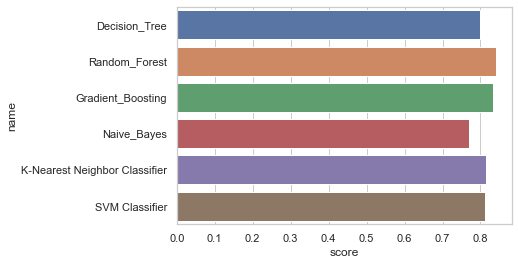

In [65]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

Pentru toti clasificatori RMSE>0, deci nici unul dintre ei nu se comporta perfect pe datele de train si test, astfel nu va avea loc fenomenul de overfitting.
Dintre toti clasificatori Naive Bayes Classifier, are cele mai apropiate valori de RMSE si MAE, atat pentru datele de test cat si pentru cele de train.
Deci consider ca Naive Bayes Classifier e cel mai mult clasificator pentru acest exemplu.

# Fine-tune  the model

In [66]:
# gasim cel mai bun model de clasificator pentru datele de train si set
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_clf = ensemble.RandomForestClassifier()
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [67]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [68]:
grid_search.best_estimator_

RandomForestClassifier(max_features=8, n_estimators=30)

In [69]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.43465595921290584 {'max_features': 2, 'n_estimators': 3}
0.4040218627243419 {'max_features': 2, 'n_estimators': 10}
0.3852197313449782 {'max_features': 2, 'n_estimators': 30}
0.4222494211285681 {'max_features': 4, 'n_estimators': 3}
0.3971102705784536 {'max_features': 4, 'n_estimators': 10}
0.38088316093164926 {'max_features': 4, 'n_estimators': 30}
0.42382010015795135 {'max_features': 6, 'n_estimators': 3}
0.39007623413704434 {'max_features': 6, 'n_estimators': 10}
0.3803012153496965 {'max_features': 6, 'n_estimators': 30}
0.4118940396379366 {'max_features': 8, 'n_estimators': 3}
0.39121017907027283 {'max_features': 8, 'n_estimators': 10}
0.3785500108862384 {'max_features': 8, 'n_estimators': 30}
0.4240813144201358 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3954335131781416 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4230354896112776 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.39290496034369427 {'bootstrap': False, 'max_features':

In [70]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011396,0.000800,0.001371,0.000146,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.200443,-0.183832,...,-0.188926,0.008186,18,-0.033499,-0.037375,-0.037375,-0.035991,-0.029623,-0.034773,0.002938
1,0.031564,0.001109,0.002625,0.000136,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.172757,-0.149502,...,-0.163234,0.008065,11,-0.009690,-0.008583,-0.009413,-0.008859,-0.008859,-0.009081,0.000407
2,0.094122,0.006098,0.006868,0.000748,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.152824,-0.128461,...,-0.148394,0.010028,4,-0.001107,-0.001661,-0.001384,-0.001384,-0.000831,-0.001274,0.000282
3,0.012847,0.000635,0.001162,0.000032,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.183832,-0.184939,...,-0.178295,0.010782,14,-0.037099,-0.029623,-0.033499,-0.037652,-0.033223,-0.034219,0.002923
4,0.041015,0.001678,0.002568,0.000133,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.157254,-0.146179,...,-0.157697,0.006130,10,-0.007752,-0.009967,-0.008306,-0.007752,-0.009136,-0.008583,0.000858
5,0.119192,0.007713,0.006021,0.000121,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.137320,-0.147287,...,-0.145072,0.004023,3,-0.001661,-0.001107,-0.000554,-0.000554,-0.001384,-0.001052,0.000443
6,0.016592,0.001383,0.001355,0.000206,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.174972,-0.161683,...,-0.179623,0.013073,16,-0.032946,-0.028516,-0.032669,-0.036822,-0.026855,-0.031561,0.003528
7,0.050480,0.002232,0.002501,0.000226,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.155039,-0.137320,...,-0.152159,0.008624,5,-0.007475,-0.005814,-0.009967,-0.008583,-0.007752,-0.007918,0.001363
8,0.144995,0.006483,0.005923,0.000212,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.153931,-0.137320,...,-0.144629,0.009945,2,-0.000831,-0.000831,-0.000831,-0.000277,-0.001107,-0.000775,0.000271
9,0.017729,0.001100,0.001170,0.000023,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.173865,-0.152824,...,-0.169657,0.011665,13,-0.029070,-0.034330,-0.030454,-0.027685,-0.037929,-0.031894,0.003745


In [71]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.18026939, 0.05238298, 0.04247973, 0.03364951, 0.0463173 ,
       0.0425861 , 0.09018629, 0.01281721, 0.00485207, 0.00519512,
       0.        , 0.03102287, 0.02814341, 0.07225972, 0.01902836,
       0.016541  , 0.02373607, 0.00785249, 0.00728281, 0.0064108 ,
       0.00725245, 0.00581743, 0.02118541, 0.03146053, 0.01226943,
       0.01247598, 0.00335261, 0.01196616, 0.04389736, 0.04327976,
       0.0452397 , 0.03878994])

Care sunt cele mai importante feature dupa care se va generea modelul.

In [72]:
sorted(zip(feature_importances, list(x_train)), reverse=True)

[(0.18026938629853315, 'is pr'),
 (0.09018628928212526, 'nr files'),
 (0.07225972101342831, 'nr commits2'),
 (0.05238298318803135, 'added lines'),
 (0.04631729562857329, 'devs parent2'),
 (0.04523970255961009, 'messages_mean'),
 (0.04389736458173387, 'messages_min'),
 (0.04327975533404831, 'messages_max'),
 (0.042586101448531546, 'time'),
 (0.04247972799569936, 'deleted lines'),
 (0.038789943527063525, 'messages_median'),
 (0.033649506972745005, 'devs parent1'),
 (0.031460527566855044, 'add'),
 (0.031022868988032293, 'modified files'),
 (0.028143408342686818, 'nr commits1'),
 (0.023736070561753878, 'fix'),
 (0.02118540810563455, 'update'),
 (0.019028363512909464, 'density1'),
 (0.01654100355071016, 'density2'),
 (0.012817213620527452, 'added files'),
 (0.012475977283031592, 'use'),
 (0.012269427339834597, 'remove'),
 (0.011966162202744077, 'change'),
 (0.007852489457620357, 'bug'),
 (0.007282814565996136, 'feature'),
 (0.007252449579059085, 'document'),
 (0.0064107993351093335, 'improv

In [73]:
final_model = grid_search.best_estimator_

train_predictions= final_model.predict(x_train_sc)

train_mse=np.sqrt(mean_squared_error( train_predictions,y_train))

print("RMSE model ales Tain:",train_mse)

mae = mean_absolute_error(train_predictions,y_train)
print("MAE  model ales Train:",mae)

final_predictions = final_model.predict(x_test_sc)

final_mse = np.sqrt(mean_squared_error(final_predictions,y_test))

print("RMSE model ales Test:",final_mse)

final_mae = mean_absolute_error( final_predictions,y_test)
print("MAE model ales Test:",final_mae)

RMSE model ales Tain: 0.029764673182427183
MAE  model ales Train: 0.0008859357696566999
RMSE model ales Test: 0.40806744957327834
MAE model ales Test: 0.16651904340124005


In [74]:
accuracy_score(y_test, final_predictions)

0.83348095659876

In [75]:
recall_score(y_test, final_predictions, average = 'macro')

0.7592794936544937

In [76]:
precision_score(y_test, final_predictions, average='binary')

0.7188755020080321

Dupa cum se observa clasificatorul cu parametrii cei mai buni generat de GridSearchCV, are valorile de mai sus. Aceste valori se aseamana cel mai bine cu valorile de la Random Forest Classifier => Deci Random Forest este cel mai bun clasificator din privinta programului.